In [1]:
import pennylane as qml
import pennylane.numpy as np
from model import Model

In [2]:
name = 'lambert'


def func(phi):
	return np.cos(phi)


consts = {'kd': 0.7}
angles = {'phi': {'range': (0, np.pi / 2)}}

In [3]:
model = Model(name)
model.set_function(func)
# model.set_consts(consts)
model.set_angles(angles)
try:
	model.read_samples('samples/' + model.name + '.bin')
except FileNotFoundError:
	model.generate_samples()
	model.read_samples('samples/' + model.name + '.bin')

model.separate()

In [4]:
model.optimizer = qml.AdamOptimizer(stepsize=0.1)

(<Figure size 400x200 with 1 Axes>, <Axes: >)

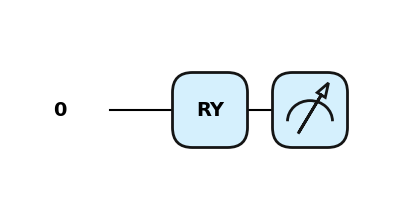

In [5]:
n_qubits = 1

model.generate_device(n_qubits)


def circuit(data, params):
	qml.RY(data[0] * params[0], wires=0)

	return qml.expval(qml.PauliZ(0))


def _model(circ, input, params):
	return circ(input, params)


model.set_model(_model)
model.set_circuit(circuit)
model.generate_params((n_qubits,))

qml.draw_mpl(model.circuit, style='pennylane')(model.train_in, model.params)

In [6]:
model.create_loss_graph()

In [43]:
model.params = np.array([np.pi - 0.05], requires_grad=True)

In [44]:
model.losses.clear()
model.loss_graph_x.clear()
model.loss_graph_y.clear()

In [45]:
model.optimizer = qml.AdamOptimizer(stepsize=0.01)

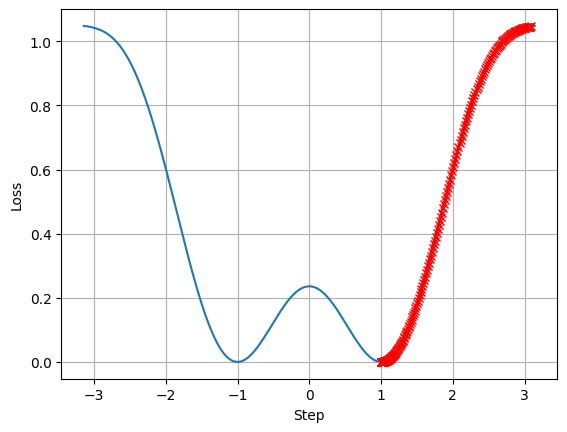

Loss: 8.796905389701922e-07
Step 243
Estimated time remaining: 00:00:22:035


In [46]:
model.set_max_steps(300)
model.set_objective(1e-6)
model.optimization(objective=True, callback='loss')

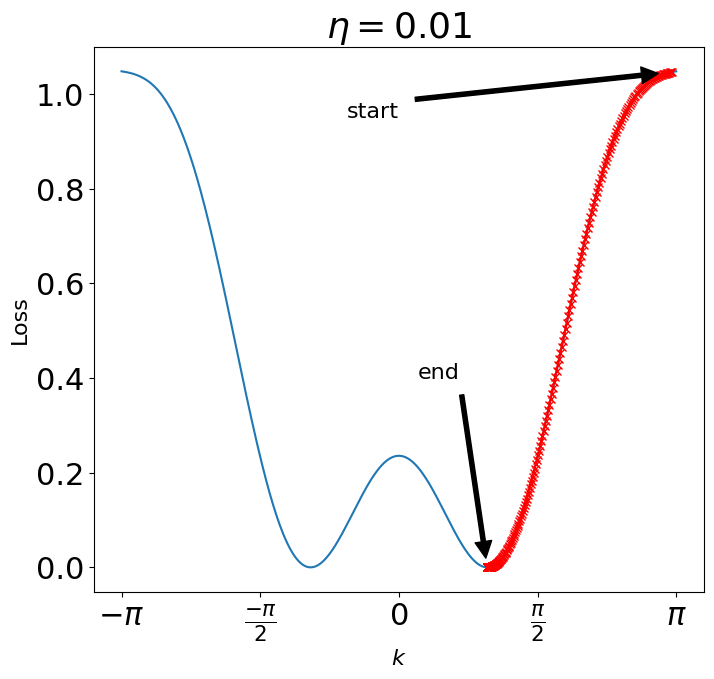

In [47]:
import matplotlib.pyplot as plt
from __formatter import multiple_formatter


fig = plt.figure(
		figsize=(20 / 2.54, 18 / 2.54),
	)

ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(-np.pi, np.pi, 500), model.loss_graph)
ax.plot(model.loss_graph_x, model.loss_graph_y, c='red', marker='x')

ax.set_xlabel('$k$', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)

ax.annotate(
	'start',
	xy=(np.pi-0.05,model.loss(np.array([np.pi-0.05],requires_grad=True),model.train_in, model.train_out)),
	xycoords='data',
	xytext=(0.5,0.9),
	textcoords='axes fraction',
	arrowprops=dict(facecolor='black', shrink=0.05,width=3),
	horizontalalignment='right',
	verticalalignment='top',
	fontsize=16
)

ax.annotate(
	'end',
	xy=(1,0),
	xycoords='data',
	xytext=(0.6,0.42),
	textcoords='axes fraction',
	arrowprops=dict(facecolor='black', shrink=0.05,width=3),
	horizontalalignment='right',
	verticalalignment='top',
	fontsize=16
)

ax.set_title(r'$\eta=0.01$', fontsize= 26)

ax.figure.axes[-1].tick_params(labelsize=22)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(8)))

fig.savefig('../dissertation/images/lambertloss001.png')

plt.show()

In [ ]:
print('Test score:', model.test())

Test score: 1.2772606897014117e-31


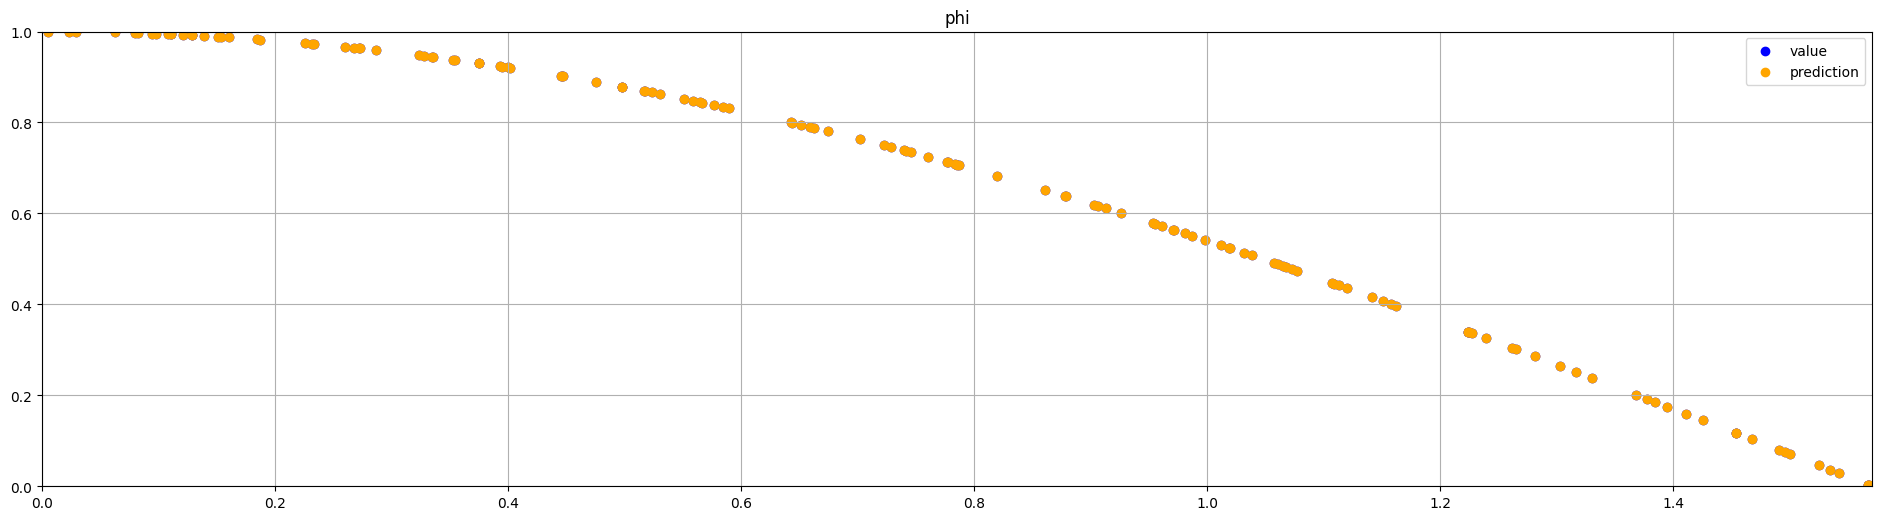

In [ ]:
model.draw_train()

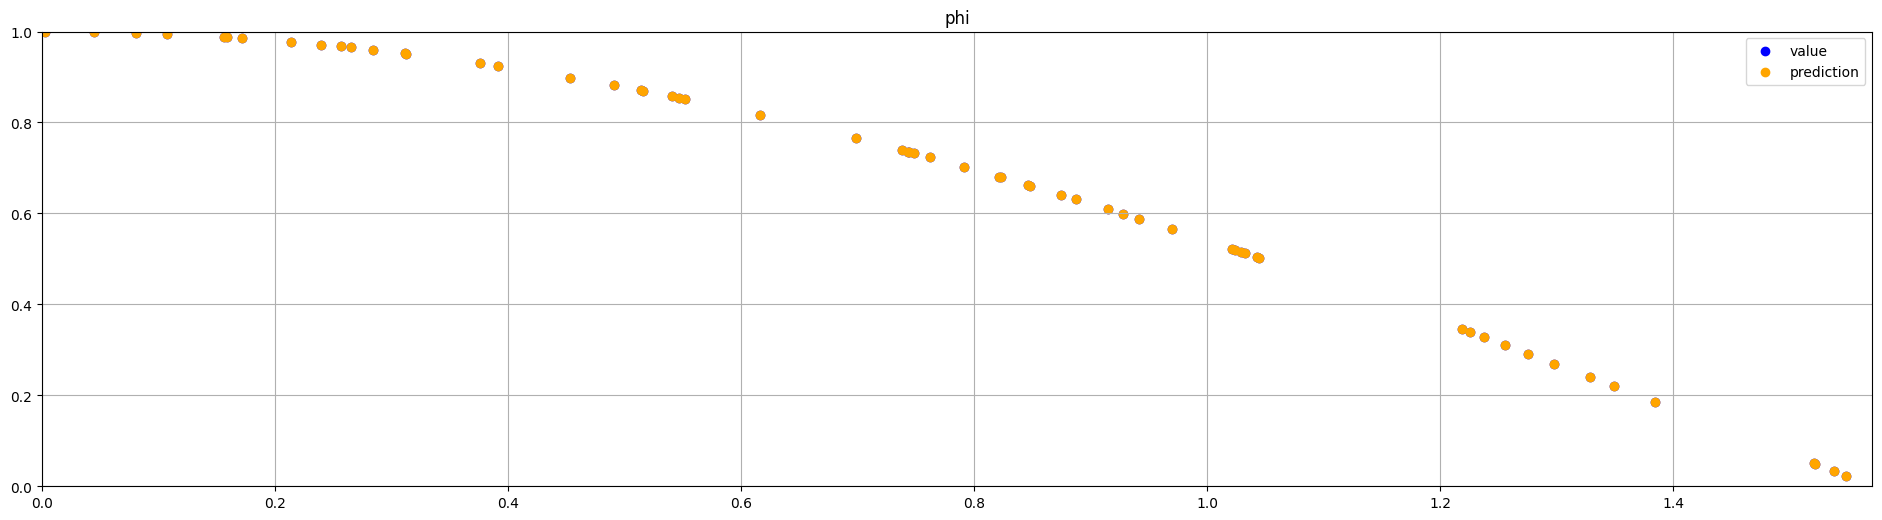

In [ ]:
model.draw()

In [ ]:
model.serialize('models/' + model.name + '.json')

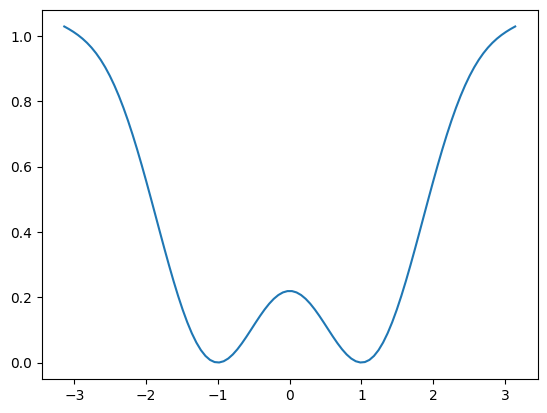

In [ ]:
y = [model.loss([x], model.train_in, model.train_out) for x in np.linspace(-np.pi, np.pi, 100)]

import matplotlib.pyplot as plt

plt.plot(np.linspace(-np.pi, np.pi, 100), y)